In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import csv


f=open('mydata.csv','r')
my_reader=csv.reader(f)
data=[]
for row in my_reader:
  if len(row)==0:
    continue
  else:
    data.append(tuple(map(float,row)))
f.close()
my_data1=np.array(data)

f=open('mydata1.csv','r')
my_reader=csv.reader(f)
data=[]
for row in my_reader:
  if len(row)==0:
    continue
  else:
    data.append(tuple(map(float,row)))
f.close()
my_data2=np.array(data)

print(len(my_data1),my_data1[0])
print(len(my_data2),my_data2[0])

8465 [52.852543 -0.37     52.831894]
6601 [56.298313 -0.36      3.753221]


In [ ]:
def get_initial_value(dataset):
  count=100
  return sum(dataset[:count])/count

def moving_avg(dataset,window=20):
  myarr=[0]*window
  mysum=0
  outdata=np.zeros(len(dataset))
  for i in range(len(dataset)):
    mysum=mysum-myarr[i%window]+dataset[i]
    myarr[i%window]=dataset[i]
    outdata[i]=mysum/window
  return outdata

def accn_to_length(dataset,time_int=0.250):
  vel=0
  length=0
  outdata=np.zeros(len(dataset))
  outdata2=np.zeros(len(dataset))
  for i in range(len(dataset)):
    outdata[i]=length
    outdata2[i]=vel
    length+=vel*time_int
    vel+=dataset[i]*time_int
  return outdata,outdata2

In [ ]:
data1_bme=my_data1[:,0]
data1_bno=my_data1[:,1]

data1_bme_init=get_initial_value(data1_bme)
data1_bno_init=get_initial_value(data1_bno)
print(data1_bme_init,data1_bno_init)
shifted_data1_bme=data1_bme-data1_bme_init
shifted_data1_bno=data1_bno-data1_bno_init

avg_data1_bme=moving_avg(shifted_data1_bme)
avg_data1_bno=moving_avg(shifted_data1_bno)

53.07434801 -0.35530000000000017


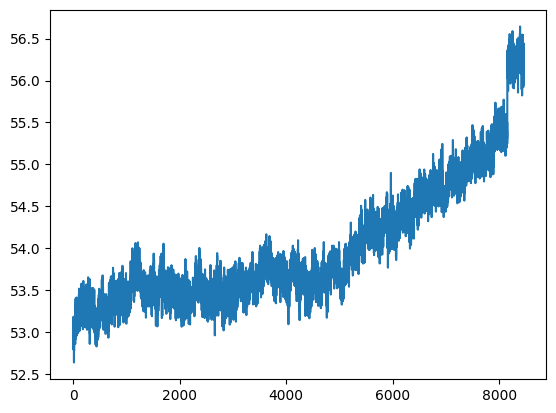

In [ ]:
plt.plot(data1_bme,label='raw')

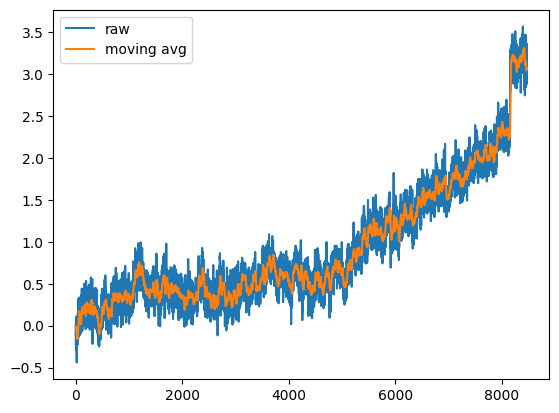

In [ ]:
plt.plot(shifted_data1_bme,label='raw')
plt.plot(avg_data1_bme,label='moving avg')
plt.legend()

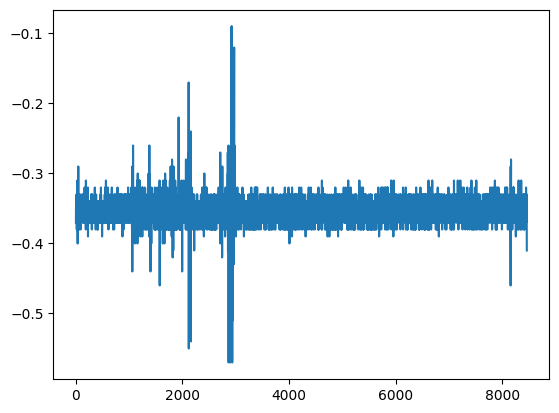

In [ ]:
plt.plot(data1_bno,label='raw')

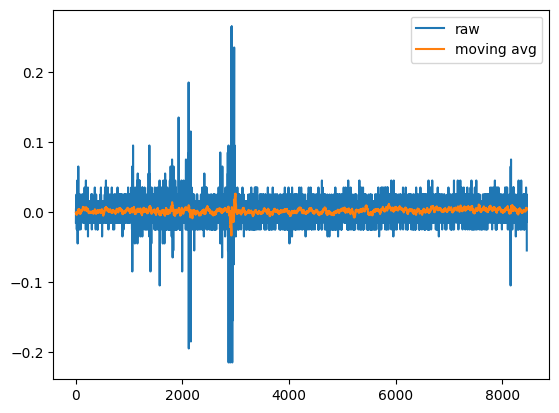

In [ ]:
plt.plot(shifted_data1_bno,label='raw')
plt.plot(avg_data1_bno,label='moving avg')
plt.legend()

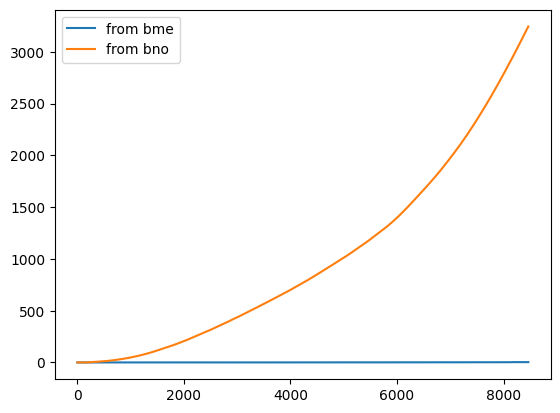

In [ ]:
height_from_accn1,velocity1=accn_to_length(avg_data1_bno)
plt.plot(avg_data1_bme,label='from bme')
plt.plot(height_from_accn1,label='from bno')
plt.legend()

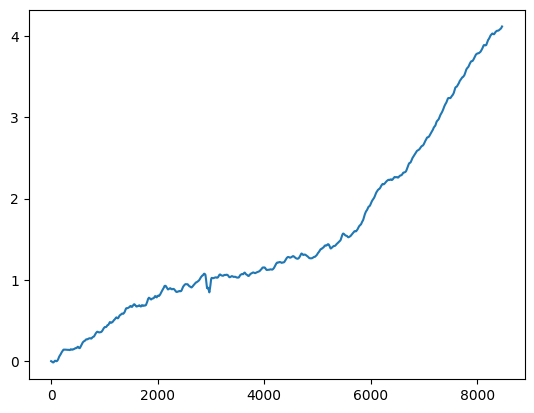

In [ ]:
plt.plot(velocity1)

(array([  2.,   2.,   5.,   3.,   5.,  13.,  37.,  46.,  66., 123., 179.,
        251., 351., 492., 510., 580., 718., 755., 687., 686., 643., 593.,
        489., 349., 265., 200., 136.,  96.,  77.,  30.,  32.,  20.,   8.,
          3.,   4.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   1.,   2.,   1.]),
 array([-0.4957817 , -0.46839862, -0.44101553, -0.41363245, -0.38624936,
        -0.35886628, -0.33148319, -0.30410011, -0.27671702, -0.24933394,
        -0.22195085, -0.19456777, -0.16718468, -0.1398016 , -0.11241851,
        -0.08503543, -0.05765234, -0.03026926, -0.00288617,  0.02449691,
         0.05188   ,  0.07926308,  0.10664617,  0.13402925,  0.16141234,
         0.18879542,  0.21617851,  0.24356159,  0.27094468,  0.29832776,
         0.32571085,  0.35309393,  0.38047702,  0.4078601 ,  0.43524319,
         0.46262627,  0.49000936,  0.51739245,  0.54477553,  0.57215861,
         0.5995417 ,  0.62692478,  0.65430787,  0.68169096,  0.70907404,
 

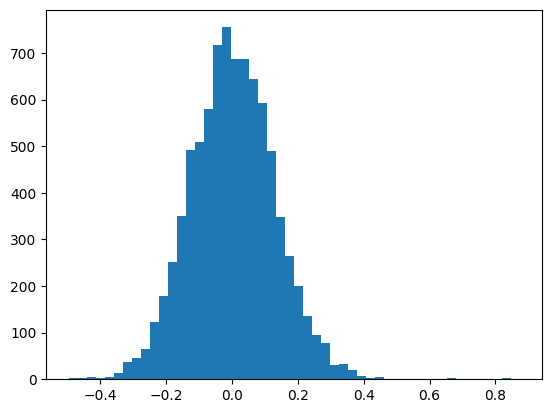

In [ ]:
error=shifted_data1_bme-avg_data1_bme
plt.hist(error,50)

(array([2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 7.000e+00, 1.500e+01,
        6.000e+01, 4.280e+02, 1.245e+03, 2.251e+03, 2.337e+03, 1.369e+03,
        5.130e+02, 1.340e+02, 2.800e+01, 1.000e+01, 1.000e+01, 1.000e+01,
        7.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([-0.21566667, -0.20589333, -0.19612   , -0.18634667, -0.17657333,
        -0.1668    , -0.15702667, -0.14725333, -0.13748   , -0.12770667,
        -0.11793333, -0.10816   , -0.09838667, -0.08861333, -0.07884   ,
        -0.06906667, -0.05929333, -0.04952   , -0.03974667, -0.02997333,
        -0.0202    , -0.01042667, -0.00065333,  0.00912   ,  0.01889333,
         0.

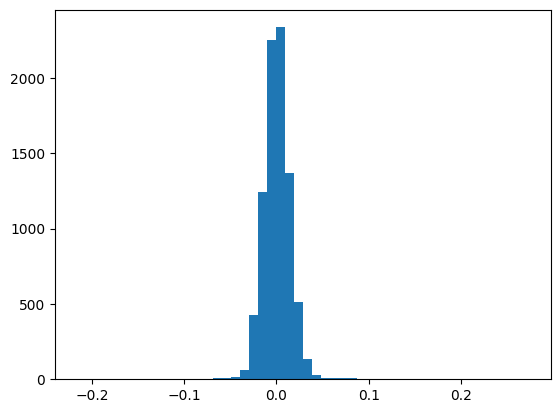

In [ ]:
error=shifted_data1_bno-avg_data1_bno
plt.hist(error,50)

In [ ]:
data2_bme=my_data2[:,0]
data2_bno=my_data2[:,1]

data2_bme_init=get_initial_value(data2_bme)
data2_bno_init=get_initial_value(data2_bno)
print(data2_bme_init,data2_bno_init)
shifted_data2_bme=data2_bme-data2_bme_init
shifted_data2_bno=data2_bno-data2_bno_init

avg_data2_bme=moving_avg(shifted_data2_bme)
avg_data2_bno=moving_avg(shifted_data2_bno)

56.33842777000001 -0.3525000000000001


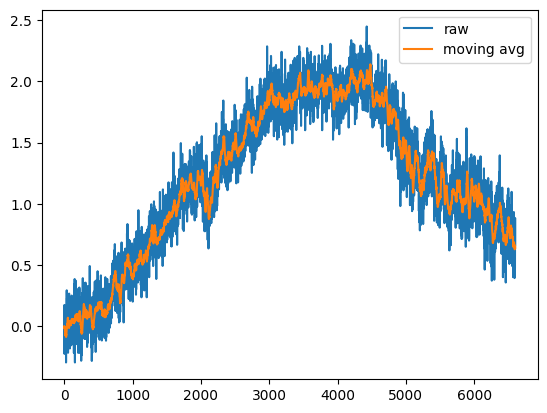

In [ ]:
plt.plot(shifted_data2_bme,label='raw')
plt.plot(avg_data2_bme,label='moving avg')
plt.legend()

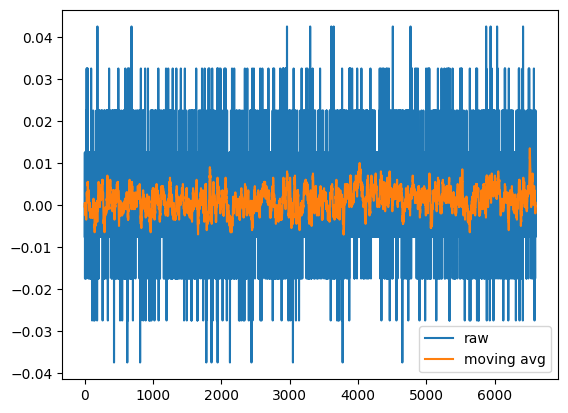

In [ ]:
plt.plot(shifted_data2_bno,label='raw')
plt.plot(avg_data2_bno,label='moving avg')
plt.legend()

(array([  2.,   1.,   0.,   1.,   3.,   4.,   3.,  13.,  14.,  15.,  28.,
         35.,  60.,  63.,  99., 113., 144., 159., 215., 263., 308., 327.,
        345., 335., 398., 467., 405., 405., 337., 358., 315., 258., 210.,
        200., 150., 138., 106.,  81.,  66.,  47.,  30.,  24.,  21.,  12.,
          6.,   4.,   7.,   2.,   1.,   3.]),
 array([-0.5140572 , -0.49407631, -0.47409543, -0.45411454, -0.43413366,
        -0.41415277, -0.39417188, -0.374191  , -0.35421011, -0.33422923,
        -0.31424834, -0.29426745, -0.27428657, -0.25430568, -0.2343248 ,
        -0.21434391, -0.19436302, -0.17438214, -0.15440125, -0.13442037,
        -0.11443948, -0.09445859, -0.07447771, -0.05449682, -0.03451594,
        -0.01453505,  0.00544584,  0.02542672,  0.04540761,  0.06538849,
         0.08536938,  0.10535027,  0.12533115,  0.14531204,  0.16529292,
         0.18527381,  0.2052547 ,  0.22523558,  0.24521647,  0.26519735,
         0.28517824,  0.30515913,  0.32514001,  0.3451209 ,  0.36510178,
 

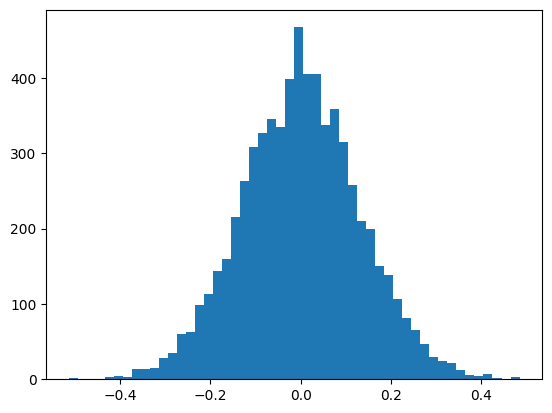

In [ ]:
error=shifted_data2_bme-avg_data2_bme
plt.hist(error,50)

(array([  1.,   1.,   3.,   1.,   6.,   6.,  11.,  18.,  11.,  22.,  15.,
         47.,  65., 128.,  86.,  93., 146., 272., 567., 463., 532., 252.,
        272., 343., 416., 532., 282., 210., 187., 361., 266., 269., 104.,
         66., 110.,  94., 111.,  60.,  42.,  26.,  27.,  23.,  21.,  13.,
          6.,   3.,   4.,   5.,   0.,   2.]),
 array([-0.0415 , -0.03978, -0.03806, -0.03634, -0.03462, -0.0329 ,
        -0.03118, -0.02946, -0.02774, -0.02602, -0.0243 , -0.02258,
        -0.02086, -0.01914, -0.01742, -0.0157 , -0.01398, -0.01226,
        -0.01054, -0.00882, -0.0071 , -0.00538, -0.00366, -0.00194,
        -0.00022,  0.0015 ,  0.00322,  0.00494,  0.00666,  0.00838,
         0.0101 ,  0.01182,  0.01354,  0.01526,  0.01698,  0.0187 ,
         0.02042,  0.02214,  0.02386,  0.02558,  0.0273 ,  0.02902,
         0.03074,  0.03246,  0.03418,  0.0359 ,  0.03762,  0.03934,
         0.04106,  0.04278,  0.0445 ]),
 <BarContainer object of 50 artists>)

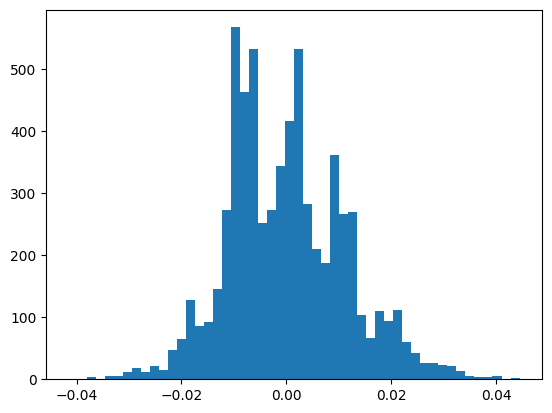

In [ ]:
error=shifted_data2_bno-avg_data2_bno
plt.hist(error,50)